# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
#!pip install citipy
#!pip install openweathermapy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy as owm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'api_keys'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
settings = {"units": "imperial", "appid": weather_api_key}

# Initialize data frame to store data from API calls


cityname = []
cloudiness = []
country = []
date = []
max_temp = []
wind_speed = []
lat = []
lng = []
humidity = []



count = 1
err = 0
sets = 0
index = 0
t0 =time.time()
print(f"Beginning Data Retrieval")
for city in cities:
    try:
        city1 = city.replace(" ", "%20")
        print(f'Processing Record {count} of Set {sets} | {city}' )
        #print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={weather_api_key}')
        city_info = owm.get_current(city, **settings)
        cityname.append(city_info["name"])
        cloudiness.append(city_info("clouds.all"))
        country.append(city_info("sys.country"))
        date.append(city_info("dt"))
        max_temp.append(city_info("main.temp_max"))
        wind_speed.append(city_info("wind.speed"))
        lat.append(city_info("coord.lat"))
        lng.append(city_info("coord.lon"))
        humidity.append(city_info("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: 
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()
print("End of Data Retrieval")
print(f"Error found for {err} cities")



Beginning Data Retrieval
Processing Record 1 of Set 0 | felidhoo
HTTP Error 404: Not Found
Processing Record 2 of Set 0 | ribeira grande
Processing Record 3 of Set 0 | isetskoye
Processing Record 4 of Set 0 | cape town
Processing Record 5 of Set 0 | obera
Processing Record 6 of Set 0 | busselton
Processing Record 7 of Set 0 | muisne
Processing Record 8 of Set 0 | qaanaaq
Processing Record 9 of Set 0 | boden
Processing Record 10 of Set 0 | marsh harbour
Processing Record 11 of Set 0 | avarua
Processing Record 12 of Set 0 | sarakhs
Processing Record 13 of Set 0 | lasa
Processing Record 14 of Set 0 | ambon
Processing Record 15 of Set 0 | albany
Processing Record 16 of Set 0 | istiaia
Processing Record 17 of Set 0 | vaini
Processing Record 18 of Set 0 | salinas
Processing Record 19 of Set 0 | hamilton
Processing Record 20 of Set 0 | wahran
HTTP Error 404: Not Found
Processing Record 21 of Set 0 | brae
Processing Record 22 of Set 0 | east london
Processing Record 23 of Set 0 | tignere
Proce

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame({"City": cityname,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})
#weather_df.to_csv("Weather.csv", encoding='utf-8', index=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [32]:
hum_100 = weather_df["Humidity"].unique()

hum_100

array([ 83,  78,  82,  98,  56,  77,  72,  88,  21,  14,  37,  94,  62,
        93,  65,  97,  74,  49,  69,  89,  92,  87,  68,  64,  45,  86,
        61,  76,  79,  32,  71,  12,  52,  81,  73,   8,  51,  95,  85,
        24,  18,  60,  66,  90,  59,  41,  39,  63, 100])

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv("../output_data/City.csv", encoding='utf-8', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature')

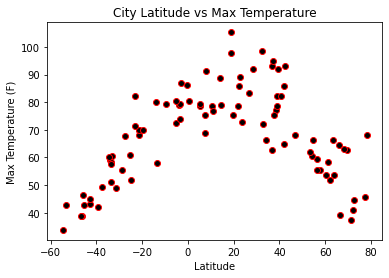

In [45]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]

plt.scatter(x_axis, y_axis, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")

## Latitude vs. Humidity Plot

In [1]:
x_axis1 = weather_df["Lat"]
y_axis1 = weather_df["Humidity"]

plt.scatter(x_axis1, y_axis1, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.savegfig("../output_data/Fig1.png")

NameError: name 'weather_df' is not defined

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness')

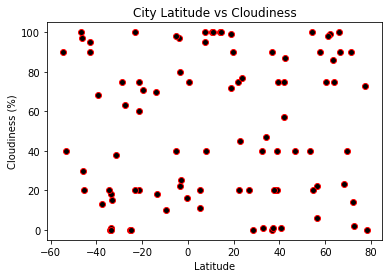

In [43]:
x_axis2=weather_df["Lat"]
y_axis2=weather_df["Cloudiness"]

plt.scatter(x_axis2, y_axis2, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed')

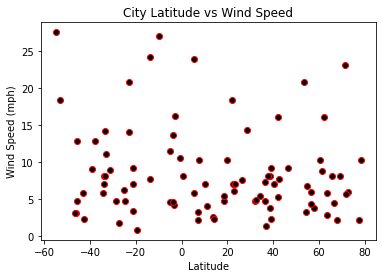

In [44]:
x_axis3=weather_df["Lat"]
y_axis3=weather_df["Wind Speed"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


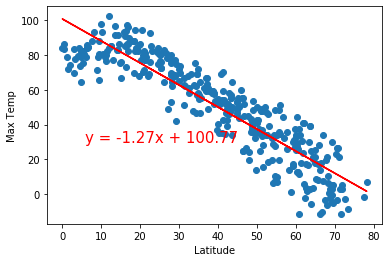

In [66]:
northern = weather_df.loc[weather_df["Lat"]>0]
northern

southern = weather_df.loc[weather_df["Lat"]<0]
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Cape Town,-33.93,18.42,59.00,82,0,8.05,ZA,1595870818
3,Oberá,-27.49,-55.12,67.93,78,63,1.68,AR,1595870937
4,Busselton,-33.65,115.33,51.01,98,18,8.08,AU,1595871401
9,Avarua,-21.21,-159.78,69.80,88,60,6.93,CK,1595871402
12,Ambon City,-3.70,128.18,79.00,14,97,13.60,ID,1595870937
15,Vaini,-21.20,-175.20,68.00,94,20,9.17,TO,1595870938
19,East London,-33.02,27.91,60.44,65,15,11.01,ZA,1595870837
23,Acaraú,-2.89,-40.12,86.97,49,25,16.15,BR,1595870938
24,Chui,-33.70,-53.46,58.46,69,1,7.00,UY,1595870652
26,New Norfolk,-42.78,147.06,43.00,89,95,2.24,AU,1595870653


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


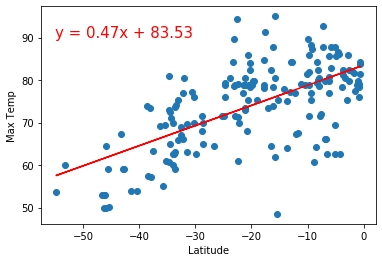

Text(0, 0.5, 'Max Temp')

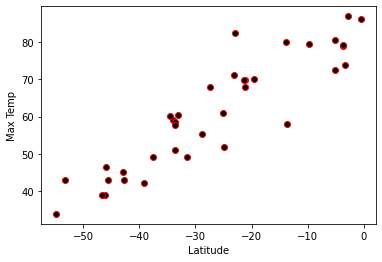

In [74]:
x_axis4=southern["Lat"]
y_axis4=southern["Max Temp"]

plt.scatter(x_axis4, y_axis4, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


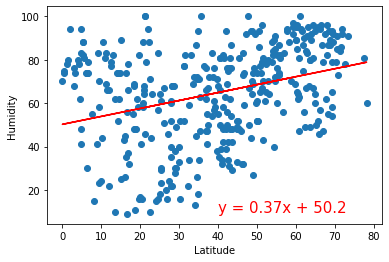

Text(0, 0.5, 'Humidity')

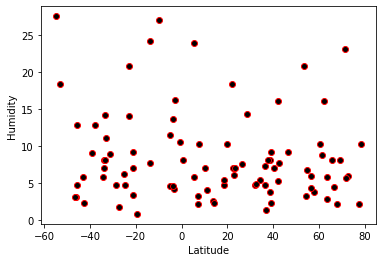

In [73]:
x_axis5=northern["Lat"]
y_axis5=northern["Humidity"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


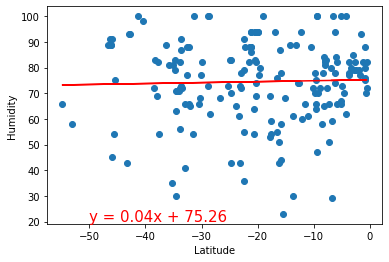

Text(0, 0.5, 'Humidity')

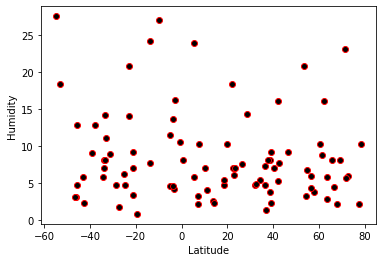

In [72]:
x_axis6=southern["Lat"]
y_axis6=southern["Humidity"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


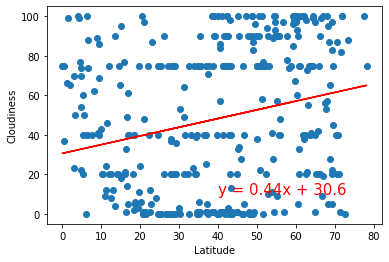

Text(0, 0.5, 'Cloudiness')

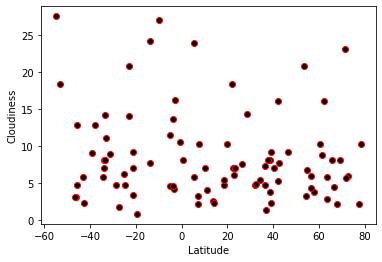

In [70]:
x_axis7=northern["Lat"]
y_axis7=northern["Cloudiness"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


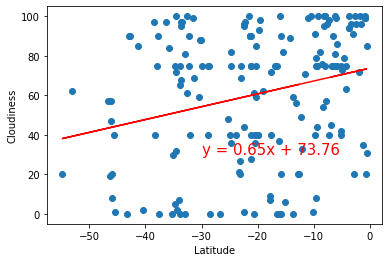

Text(0, 0.5, 'Cloudiness')

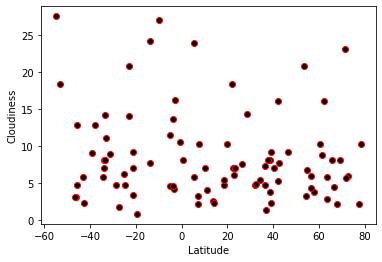

In [69]:
x_axis8=southern["Lat"]
y_axis8=southern["Cloudiness"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


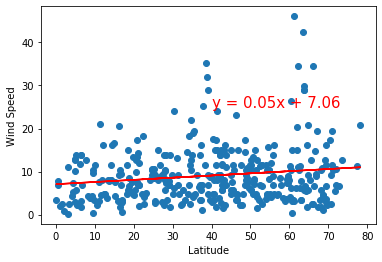

Text(0, 0.5, 'Wind Speed (mph)')

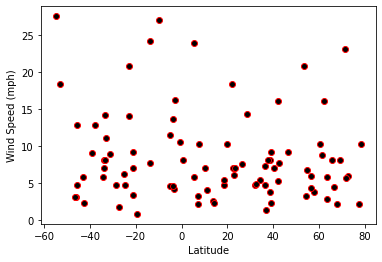

In [68]:
x_axis9=northern["Lat"]
y_axis9=northern["Wind Speed"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


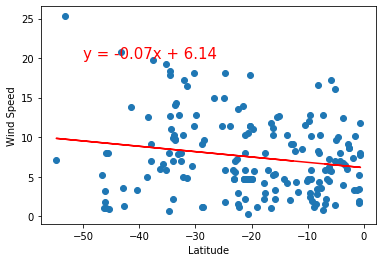

Text(0, 0.5, 'Wind Speed (mph)')

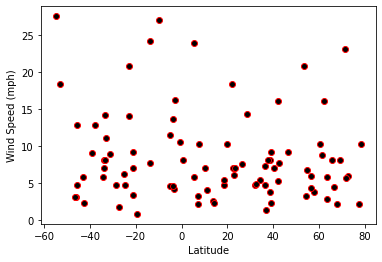

In [67]:
x_axis10=southern["Lat"]
y_axis10=southern["Wind Speed"]

plt.scatter(x_axis3, y_axis3, color="red", facecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
